In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
animal = pd.read_csv("aac_shelter_cat_outcome_eng.csv")
len(animal)

29421

In [8]:
animal_2 = pd.read_csv("aac_shelter_outcomes.csv")
animal_2.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [9]:
#Create three dataframe for cat, dog, and other animals
cat_outcome_df = animal_2[animal_2['animal_type'] == 'Cat'].reset_index()
dog_outcome_df = animal_2[animal_2['animal_type'] == 'Dog'].reset_index()
other_outcome_df = animal_2[animal_2['animal_type'] == 'Other'].reset_index()

In [10]:
animal_2.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [11]:
cat_outcome_df['outcome_type'].value_counts()

outcome_type
Transfer           13323
Adoption           12732
Euthanasia          1453
Return to Owner     1431
Died                 403
Rto-Adopt             33
Missing               28
Disposal              16
Name: count, dtype: int64

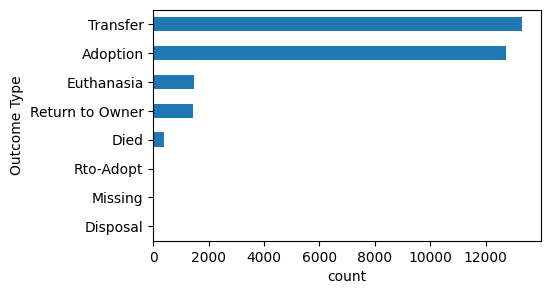

In [12]:
#Shows the outcome for cat in shelter
plt.figure(figsize=(5,3))
cat_outcome_df['outcome_type'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('count')
plt.ylabel('Outcome Type')
plt.show()

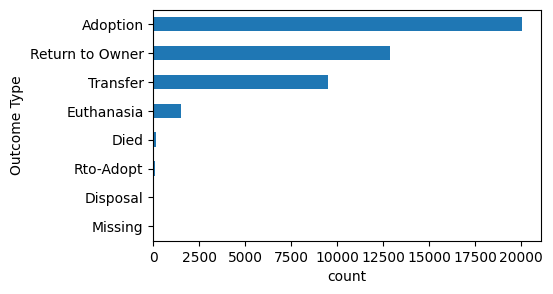

In [13]:
#Shows the outcome for dog in shelter
plt.figure(figsize=(5,3))
dog_outcome_df['outcome_type'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('count')
plt.ylabel('Outcome Type')
plt.show()

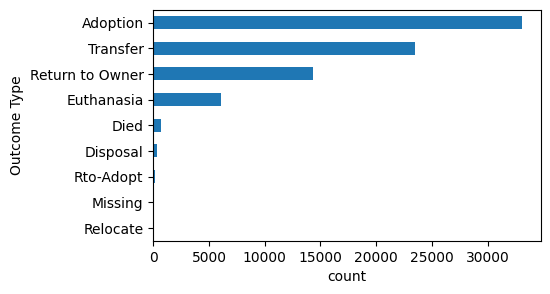

In [14]:
#Shows the outcome for all animal in shelter
plt.figure(figsize=(5,3))
animal_2['outcome_type'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('count')
plt.ylabel('Outcome Type')
plt.show()

In [15]:
def convert_age_to_days(age_str):
    if pd.isnull(age_str):
        return np.nan
    
    age_str = age_str.strip().lower()
    number, unit = age_str.split()[0], age_str.split()[1]
    number = int(number)
    
    if 'day' in unit:
        return number
    elif 'week' in unit:
        return number * 7
    elif 'month' in unit:
        return number * 30
    elif 'year' in unit:
        return number * 365
    else:
        return np.nan

In [16]:
#Find the number for adopted kitten and adopted cat
cat_outcome_df['age(days)'] = cat_outcome_df['age_upon_outcome'].apply(convert_age_to_days)
cat_outcome_df['Kitten/Cat'] = np.where(cat_outcome_df['age(days)'] >= 180, 'Cat', 'Kitten')
cat_outcome_df['Kitten/Cat'].value_counts()

Kitten/Cat
Kitten    17401
Cat       12021
Name: count, dtype: int64

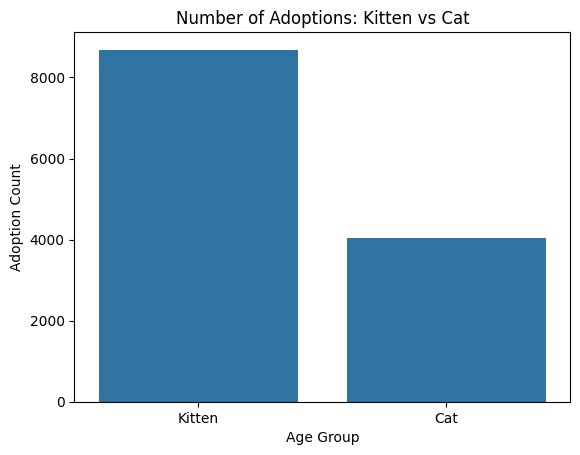

In [17]:
cat_outcome_df['was_adopted'] = (cat_outcome_df['outcome_type'] == 'Adoption').astype(int)
adopted_cats = cat_outcome_df[cat_outcome_df['was_adopted'] == 1]
sns.countplot(data=adopted_cats, x='Kitten/Cat', order=['Kitten', 'Cat'])
plt.title('Number of Adoptions: Kitten vs Cat')
plt.xlabel('Age Group')
plt.ylabel('Adoption Count')
plt.show()

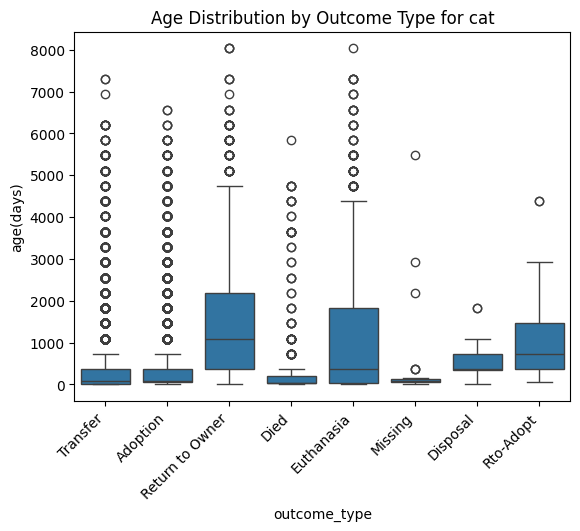

In [18]:
sns.boxplot(x='outcome_type', y='age(days)', data=cat_outcome_df)
plt.title('Age Distribution by Outcome Type for cat')
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
#Find the number for adopted puppy and adopted dog
dog_outcome_df['age(days)'] = dog_outcome_df['age_upon_outcome'].apply(convert_age_to_days)
dog_outcome_df['Puppy/Dog'] = np.where(dog_outcome_df['age(days)'] >= 365, 'Dog', 'Puppy')
dog_outcome_df['Puppy/Dog'].value_counts()

Puppy/Dog
Dog      31823
Puppy    12419
Name: count, dtype: int64

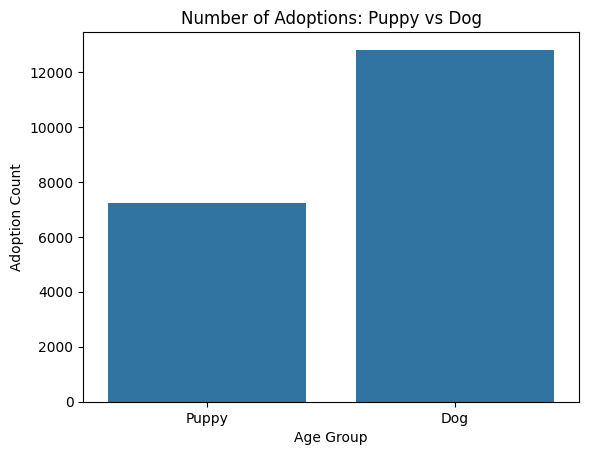

In [20]:
dog_outcome_df['was_adopted'] = (dog_outcome_df['outcome_type'] == 'Adoption').astype(int)
adopted_dogs = dog_outcome_df[dog_outcome_df['was_adopted'] == 1]
sns.countplot(data=adopted_dogs, x='Puppy/Dog', order=['Puppy', 'Dog'])
plt.title('Number of Adoptions: Puppy vs Dog')
plt.xlabel('Age Group')
plt.ylabel('Adoption Count')
plt.show()

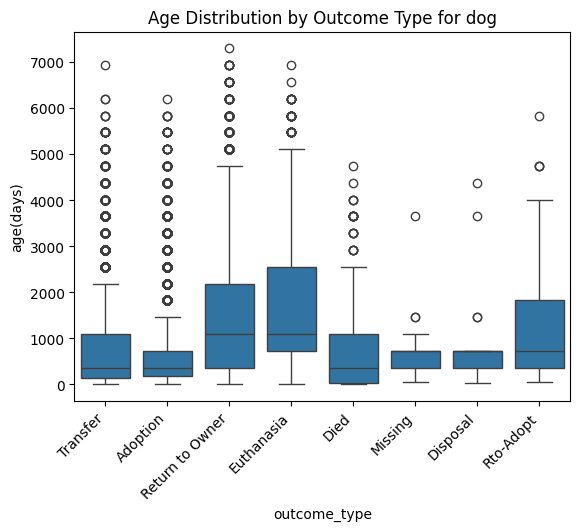

In [21]:
sns.boxplot(x='outcome_type', y='age(days)', data=dog_outcome_df)
plt.title('Age Distribution by Outcome Type for dog')
plt.xticks(rotation=45, ha='right')
plt.show()

In [22]:
#Base on the aboved result, we can say, if you want to adopt an animal from animal shelter, for cat, the shelter usually have
#larger number of kitten than that of adult cat. If you like adopt a animal from their young age, you can consider to choose cat
#For dog, the number of puppy will usually smaller than number of adult dog which is older than 1 year age. So, from the shelter
#is will be more possible for you to find an adult dog you like. 

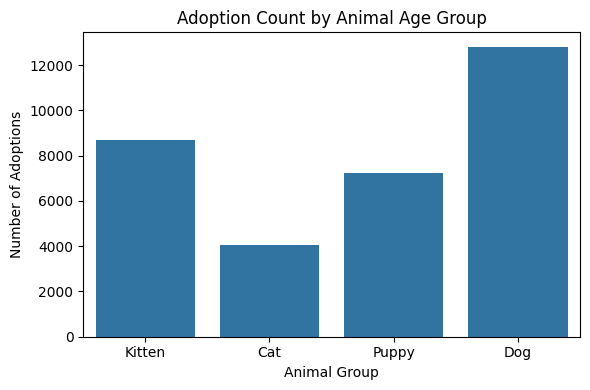

In [23]:
adopted_cats = cat_outcome_df[cat_outcome_df['outcome_type'] == 'Adoption'].copy()
adopted_dogs = dog_outcome_df[dog_outcome_df['outcome_type'] == 'Adoption'].copy()

adopted_cats['Group'] = adopted_cats['Kitten/Cat']
adopted_dogs['Group'] = adopted_dogs['Puppy/Dog']

adopted_animals = pd.concat([adopted_cats, adopted_dogs], axis=0)
group_counts = adopted_animals['Group'].value_counts().reindex(['Kitten', 'Cat', 'Puppy', 'Dog'])

plt.figure(figsize=(6, 4))
sns.barplot(x=group_counts.index, y=group_counts.values)
plt.title('Adoption Count by Animal Age Group')
plt.xlabel('Animal Group')
plt.ylabel('Number of Adoptions')
plt.tight_layout()
plt.show()

In [24]:
#Shows the breed arrangement for cat
cat_outcome_df['breed'].value_counts()

breed
Domestic Shorthair Mix                     23335
Domestic Medium Hair Mix                    2323
Domestic Longhair Mix                       1228
Siamese Mix                                  998
Domestic Shorthair                           386
                                           ...  
Manx/Siamese                                   1
Domestic Shorthair/British Shorthair           1
Domestic Longhair/Russian Blue                 1
Domestic Shorthair/Domestic Medium Hair        1
Domestic Medium Hair/Manx                      1
Name: count, Length: 79, dtype: int64

In [25]:
#We can get the most common breed for cat in shelter
common_breeds_cats = [
    'Domestic Shorthair Mix',
    'Domestic Medium Hair Mix',
    'Domestic Longhair Mix',
    'Siamese Mix',
    'Domestic Shorthair'
]
common_cats = cat_outcome_df[cat_outcome_df['breed'].isin(common_breeds_cats)]

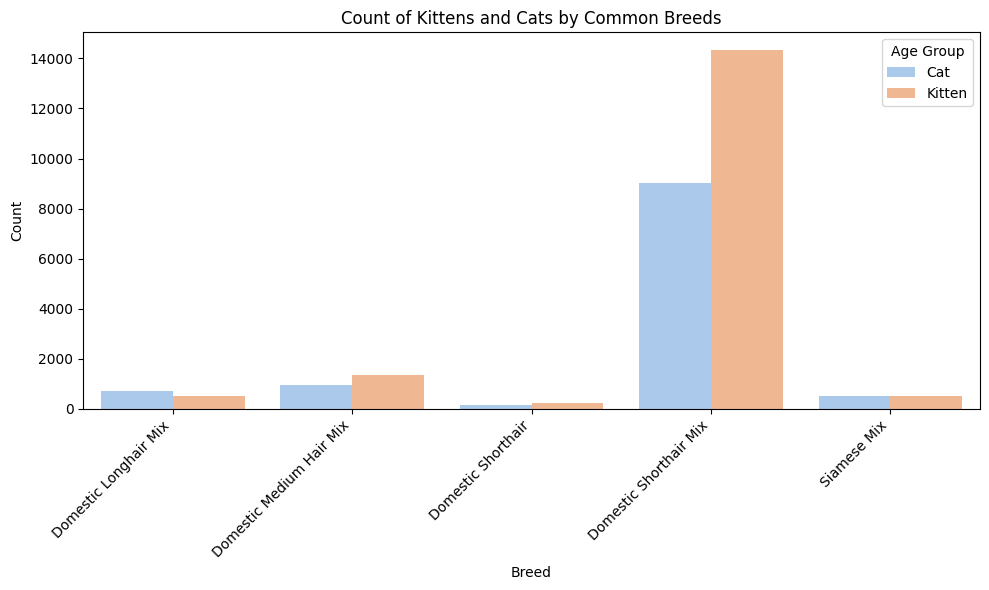

In [51]:
#We count the number of kitten and adult cat for these common breeds
breed_age_counts_cat = common_cats.groupby(['breed', 'Kitten/Cat']).size().reset_index(name='count')
breed_age_counts_cat['fraction'] = breed_age_counts_cat.groupby('breed')['count'].transform(lambda x: x / x.sum())
plt.figure(figsize=(10, 6))
sns.barplot(
    data=breed_age_counts_cat,
    x='breed',
    y='count',
    hue='Kitten/Cat',
    palette='pastel'
)
plt.title('Count of Kittens and Cats by Common Breeds')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

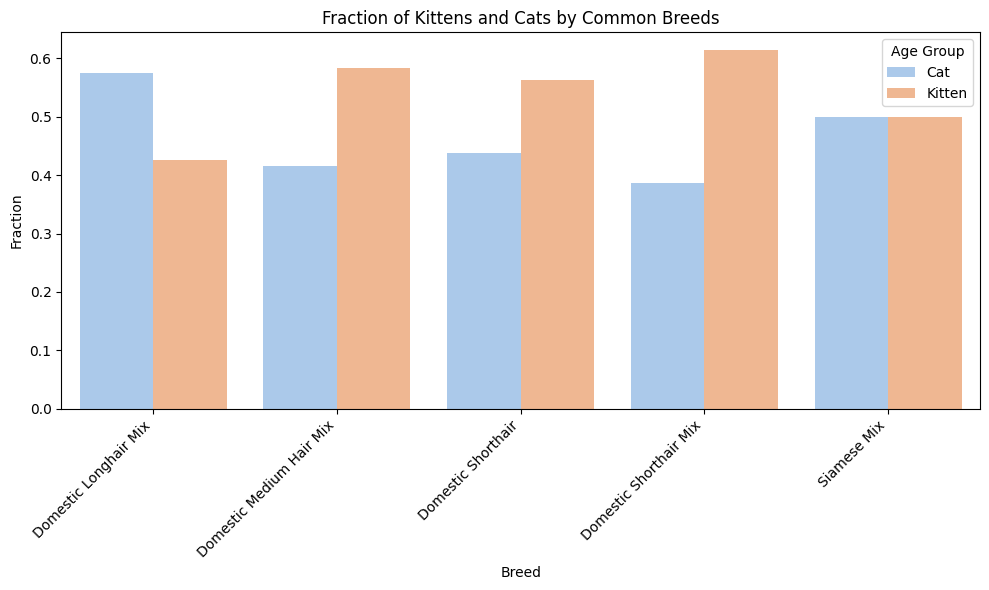

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=breed_age_counts_cat,
    x='breed',
    y='fraction',
    hue='Kitten/Cat',
    palette='pastel'
)
plt.title('Fraction of Kittens and Cats by Common Breeds')
plt.xlabel('Breed')
plt.ylabel('Fraction')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

In [57]:
dog_outcome_df['breed'].value_counts().head(15)

breed
Pit Bull Mix                 6135
Chihuahua Shorthair Mix      4733
Labrador Retriever Mix       4608
German Shepherd Mix          1892
Australian Cattle Dog Mix    1059
Dachshund Mix                 798
Boxer Mix                     674
Miniature Poodle Mix          648
Border Collie Mix             646
Catahoula Mix                 476
Rat Terrier Mix               456
Australian Shepherd Mix       454
Yorkshire Terrier Mix         437
Siberian Husky Mix            418
Jack Russell Terrier Mix      416
Name: count, dtype: int64

In [55]:
common_breeds_dogs = [
    'Pit Bull Mix',
    'Chihuahua Shorthair Mix',                              
    'Labrador Retriever Mix', 
    'German Shepherd Mix',
    'Australian Cattle Dog Mix',
    'Dachshund Mix',
    'Boxer Mix',
    'Miniature Poodle Mix',
    'Border Collie Mix'
    
]
common_dogs = dog_outcome_df[dog_outcome_df['breed'].isin(common_breeds_dogs)]

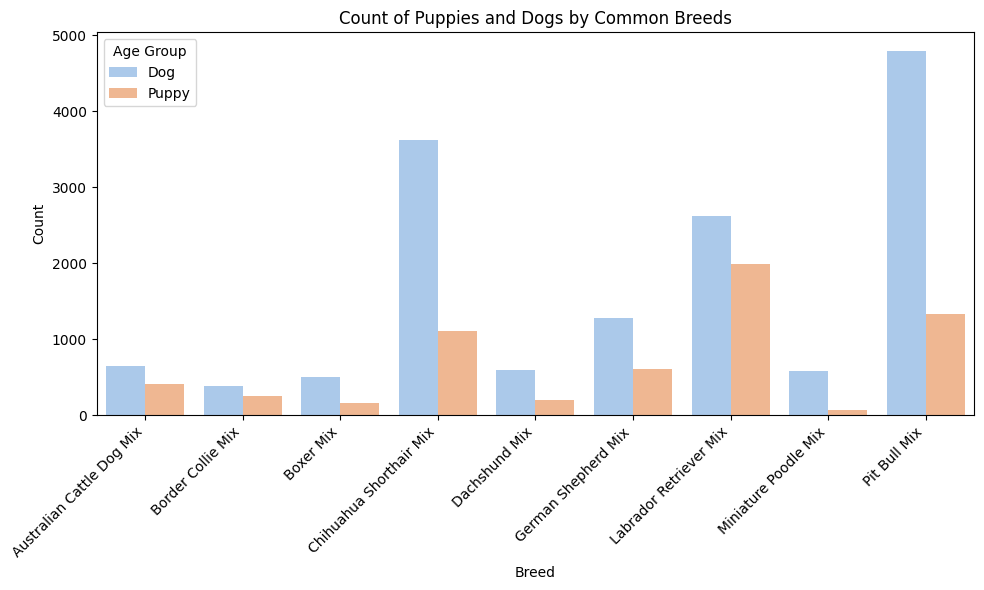

In [59]:
breed_age_counts_dog = common_dogs.groupby(['breed', 'Puppy/Dog']).size().reset_index(name='count')
breed_age_counts_dog['fraction'] = breed_age_counts_dog.groupby('breed')['count'].transform(lambda x: x / x.sum())
plt.figure(figsize=(10, 6))
sns.barplot(
    data=breed_age_counts_dog,
    x='breed',
    y='count',
    hue='Puppy/Dog',
    palette='pastel'
)
plt.title('Count of Puppies and Dogs by Common Breeds')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

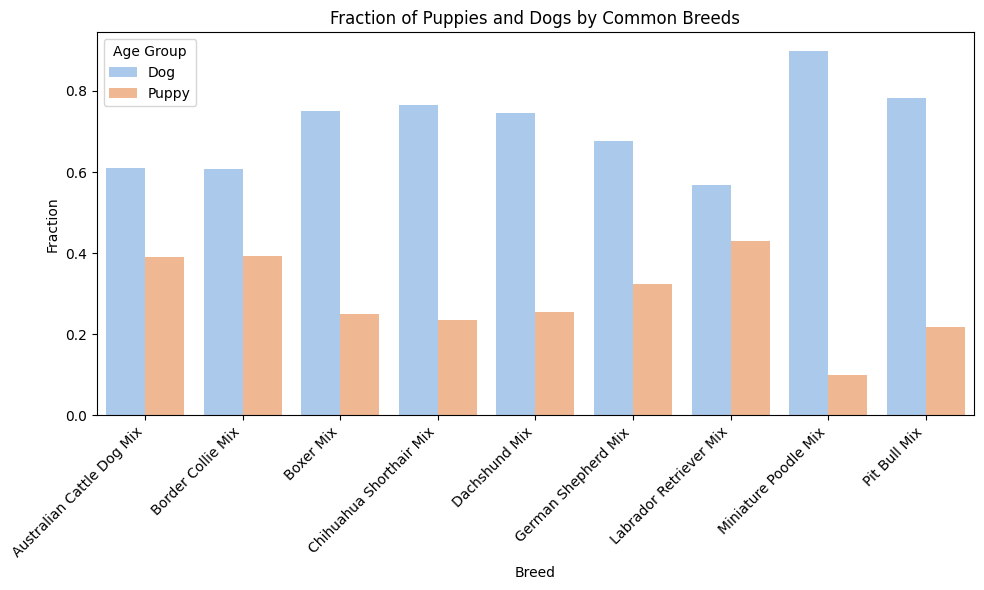

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=breed_age_counts_dog,
    x='breed',
    y='fraction',
    hue='Puppy/Dog',
    palette='pastel'
)
plt.title('Fraction of Puppies and Dogs by Common Breeds')
plt.xlabel('Breed')
plt.ylabel('Fraction')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

In [56]:
cat_outcome_df['color'].value_counts().head(10)

color
Brown Tabby           4445
Black                 3847
Black/White           2804
Brown Tabby/White     2338
Orange Tabby          2180
Tortie                1335
Calico                1318
Blue Tabby            1130
Orange Tabby/White    1095
Blue                  1058
Name: count, dtype: int64

In [57]:
common_colors_cats = [
    'Brown Tabby',           
    'Black',                 
    'Black/White',           
    'Brown Tabby/White',     
    'Orange Tabby',          
    'Tortie',                
    'Calico',                
    'Blue Tabby',            
    'Orange Tabby/White',    
    'Blue'          
]
filtered_cat_df = cat_outcome_df[
    (cat_outcome_df['breed'].isin(common_breeds_cats)) &
    (cat_outcome_df['color'].isin(common_colors_cats))
].copy()

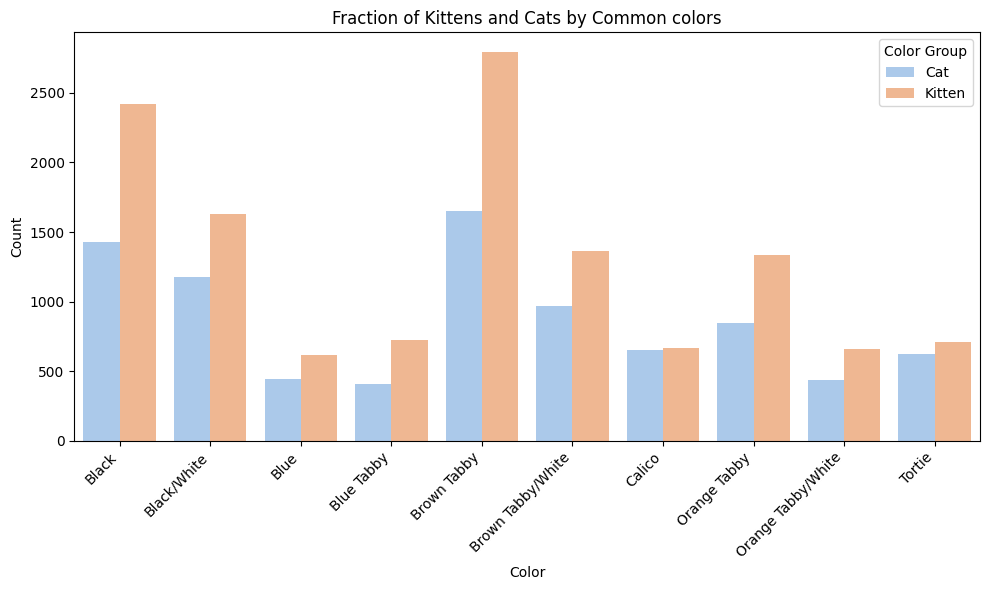

In [89]:
common_cats_color = cat_outcome_df[cat_outcome_df['color'].isin(common_colors_cats)]
age_color_counts_cat = common_cats_color.groupby(['color', 'Kitten/Cat']).size().reset_index(name='count')
age_color_counts_cat['fraction'] = age_color_counts_cat.groupby('color')['count'].transform(lambda x: x / x.sum())
plt.figure(figsize=(10, 6))
sns.barplot(
    data=age_color_counts_cat,
    x='color',
    y='count',
    hue='Kitten/Cat',
    palette='pastel'
)
plt.title('Fraction of Kittens and Cats by Common colors')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Color Group')
plt.tight_layout()
plt.show()

In [59]:
grouped_cat = (
    filtered_cat_df
    .groupby(['breed', 'color', 'Kitten/Cat'])
    .size()
    .reset_index(name='count')
)
grouped_cat['breed_color'] = grouped_cat['breed'] + " / " + grouped_cat['color']

top_groups_cat = (
    grouped_cat.groupby('breed_color')['count']
    .sum()
    .sort_values(ascending=False)
    .head(10) 
)
top_grouped_cat = grouped_cat[grouped_cat['breed_color'].isin(top_groups_cat.index)]

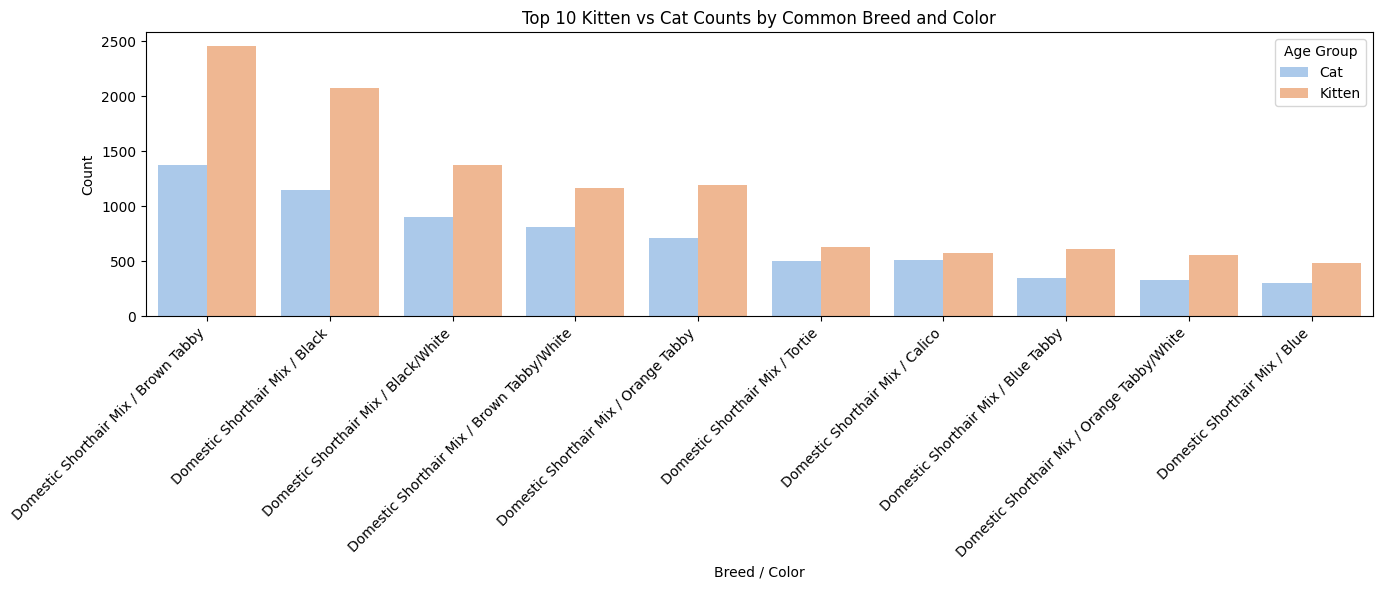

In [61]:
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_grouped_cat,
    x='breed_color',
    y='count',
    hue='Kitten/Cat',
    palette='pastel',
    order=top_groups_cat.index
)

plt.title('Top 10 Kitten vs Cat Counts by Common Breed and Color')
plt.xlabel('Breed / Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

In [63]:
dog_outcome_df['color'].value_counts().head(10)

color
Black/White    5087
Black          2479
Brown/White    2392
Tan/White      2382
White          2313
Tan            1940
Tricolor       1923
Black/Tan      1828
Brown          1807
White/Brown    1501
Name: count, dtype: int64

In [65]:
common_colors_dogs = [
    'Black/White',           
    'Black',                  
    'Brown/White',            
    'Tan/White',              
    'White',                  
    'Tan',                    
    'Tricolor',               
    'Black/Tan'            
    'Brown',    
    'White/Brown'
]
filtered_dog_df = dog_outcome_df[
    (dog_outcome_df['breed'].isin(common_breeds_dogs)) &
    (dog_outcome_df['color'].isin(common_colors_dogs))
].copy()

In [67]:
grouped_dog = (
    filtered_dog_df
    .groupby(['breed', 'color', 'Puppy/Dog'])
    .size()
    .reset_index(name='count')
)
grouped_dog['breed_color'] = grouped_dog['breed'] + " / " + grouped_dog['color']

top_groups_dog = (
    grouped_dog.groupby('breed_color')['count']
    .sum()
    .sort_values(ascending=False)
    .head(10) 
)
top_grouped_dog = grouped_dog[grouped_dog['breed_color'].isin(top_groups_dog.index)]

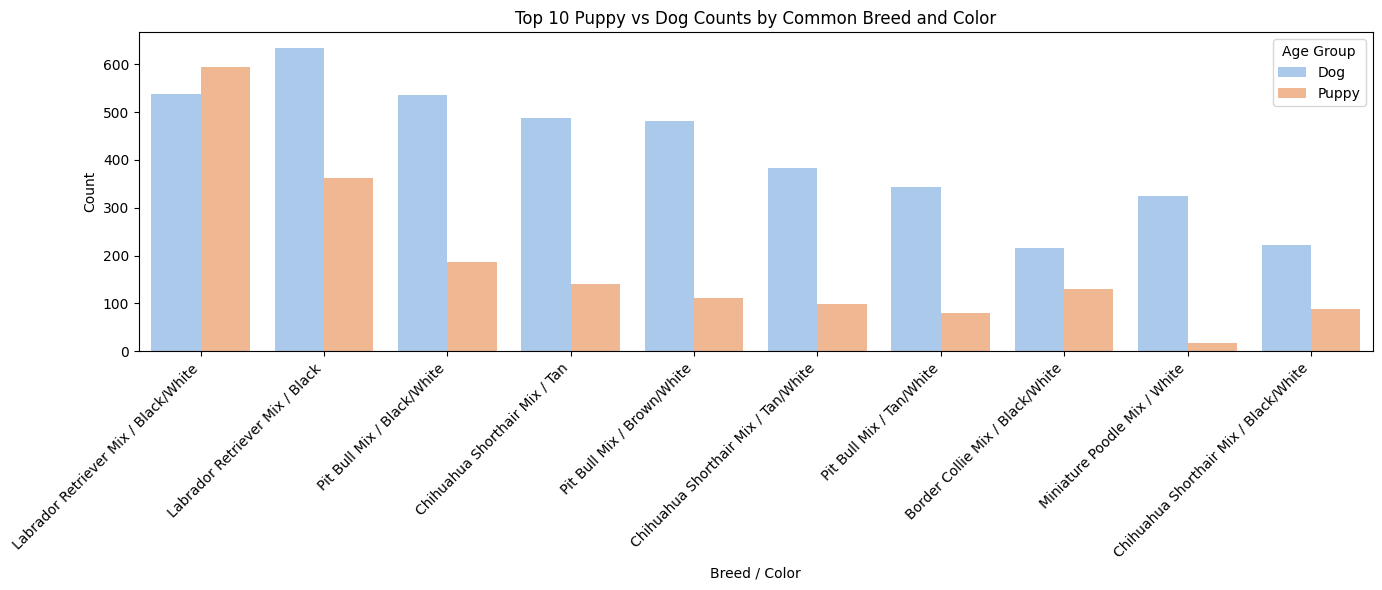

In [69]:
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_grouped_dog,
    x='breed_color',
    y='count',
    hue='Puppy/Dog',
    palette='pastel',
    order=top_groups_dog.index
)

plt.title('Top 10 Puppy vs Dog Counts by Common Breed and Color')
plt.xlabel('Breed / Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

In [71]:
cat_outcome_df['sex_upon_outcome'].value_counts()

sex_upon_outcome
Spayed Female    8781
Neutered Male    8758
Intact Female    4886
Intact Male      4469
Unknown          2528
Name: count, dtype: int64

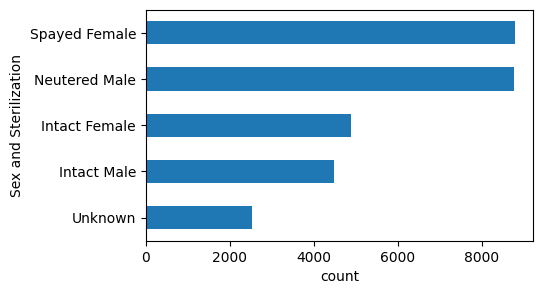

In [73]:
plt.figure(figsize=(5,3))
cat_outcome_df['sex_upon_outcome'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('count')
plt.ylabel('Sex and Sterilization')
plt.show()

In [75]:
dog_outcome_df['sex_upon_outcome'].value_counts()

sex_upon_outcome
Neutered Male    18934
Spayed Female    16338
Intact Male       4714
Intact Female     4018
Unknown            236
Name: count, dtype: int64

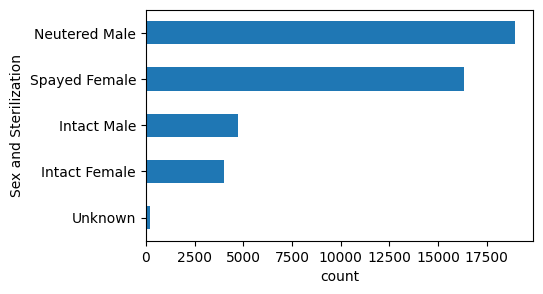

In [77]:
plt.figure(figsize=(5,3))
dog_outcome_df['sex_upon_outcome'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('count')
plt.ylabel('Sex and Sterilization')
plt.show()

In [79]:
cat_outcome_df['outcome_type'].value_counts()

outcome_type
Transfer           13323
Adoption           12732
Euthanasia          1453
Return to Owner     1431
Died                 403
Rto-Adopt             33
Missing               28
Disposal              16
Name: count, dtype: int64

In [118]:
animal_2 = animal_2.drop(columns=[
    'animal_id', 'name', 'outcome_subtype', 'date_of_birth', 'datetime', 'monthyear'  
])

In [120]:
animal_2['age(days)'] = animal_2['age_upon_outcome'].apply(convert_age_to_days)
animal_2

,age_upon_outcome,animal_type,breed,color,outcome_type,sex_upon_outcome,age(days)
0,2 weeks,Cat,Domestic Shorthair Mix,Orange Tabby,Transfer,Intact Male,14.0
1,1 year,Dog,Beagle Mix,White/Brown,Transfer,Spayed Female,365.0
2,1 year,Dog,Pit Bull,Blue/White,Adoption,Neutered Male,365.0
3,9 years,Dog,Miniature Schnauzer Mix,White,Transfer,Neutered Male,3285.0
4,5 months,Other,Bat Mix,Brown,Euthanasia,Unknown,150.0
...,...,...,...,...,...,...,...
78251,1 month,Dog,Golden Retriever/Labrador Retriever,Brown/White,Adoption,Spayed Female,30.0
78252,3 years,Dog,Mastiff Mix,Blue/White,Adoption,Neutered Male,1095.0
78253,NaN,Other,Bat Mix,Brown,Euthanasia,Unknown,NaN
78254,2 months,Dog,Standard Schnauzer,Red,Adoption,Spayed Female,60.0


In [122]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split


onehot_ftrs = ['breed', 'color','sex_upon_outcome']
std_ftrs = ['age(days)']
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])
clf = Pipeline(steps=[('preprocessor', preprocessor)])

In [124]:
y = animal_2['outcome_type']
X = animal_2.loc[:, animal_2.columns != 'outcome_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)


In [128]:
X_train_prep = clf.fit_transform(X_train)
print(X_train_prep.shape)
print(X_train.shape)

(31302, 1817)
(31302, 6)


In [144]:
#Find whether older animals less likely to be adopted
animal_2_aged = animal_2
animal_2_aged['age_months'] = animal_2_aged['age_upon_outcome'].apply(convert_age_to_days)/30
animal_2_aged['was_adopted'] = (animal_2_aged['outcome_type'] == 'Adoption').astype(int)
animal_2_aged.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,age_days,was_adopted,age_months
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male,14.0,0,0.466667
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,365.0,0,12.166667
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,365.0,1,12.166667
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,3285.0,0,109.500000
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown,150.0,0,5.000000
